# Data spaces thesis
## Andrea Settimo 262710
## Leonardo Tolomei 267638
___________________________________________________________________________________________________________________

## Import part

In [1]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree


___________________________________________________________________________________________________________________

## 1. Load the dataset

Link: http://archive.ics.uci.edu/ml/datasets/Forest+Fires

In [2]:
dataset = pd.read_csv("./Dataset/forestfires.csv")
dataset.head()                                      # Shows the first five rows.


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


___________________________________________________________________________________________________________________

## 2. Data Analysis

**The dataset size is:**

In [3]:
dataset.shape


(517, 13)

**The dataset features are:**

In [4]:
featureNames = list(dataset)
print(featureNames)


['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']


**The meaning of features:**
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9 
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9 
3. month - month of the year: 'jan' to 'dec' 
4. day - day of the week: 'mon' to 'sun' 
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20 
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10 
9. temp - temperature in Celsius degrees: 2.2 to 33.30 
10. RH - relative humidity in %: 15.0 to 100 
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 (this feature is the target)

**Statistics:**

In [5]:
dataset.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [6]:
print(f"Missing values:\n{dataset.isnull().sum()}")

Missing values:
X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


**Features distributions:**

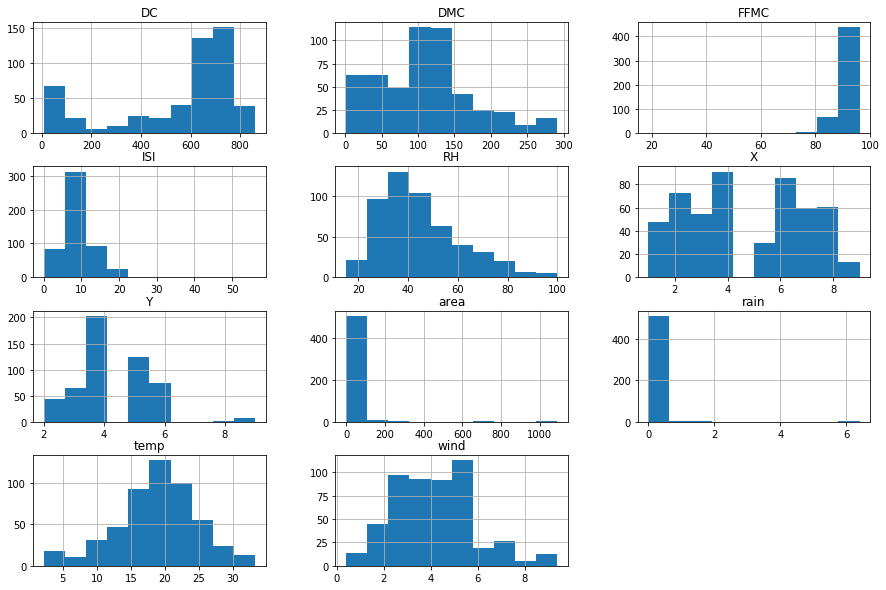

In [7]:
dataset.hist(figsize=(15,10))
plt.show()

**Box plot:**

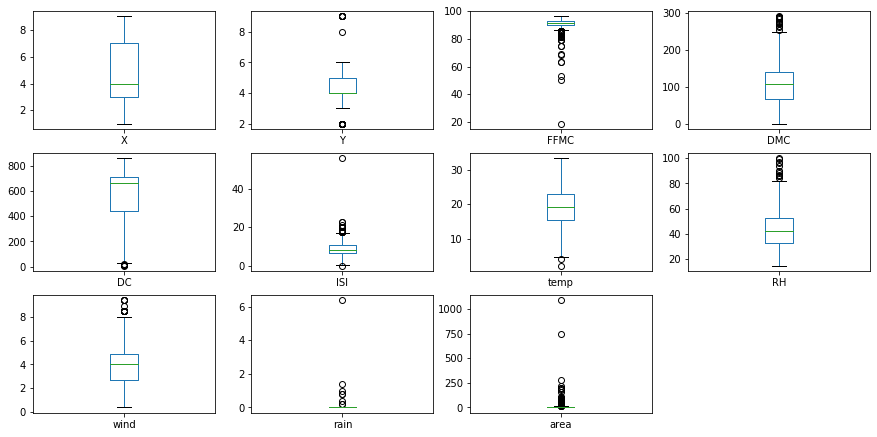

In [8]:
dataset.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,10), sharex=False, sharey=False)
plt.show()

**Correletion Matrix:**

Pre-Processing the dataset: trasformazione della features month e day in numeri cosi da poter calcolare la matrice di correlazione

In [9]:
months = {
    'jan': 0,
    'feb': 1,
    'mar': 2,
    'apr': 3,
    'may': 4,
    'jun': 5,
    'jul': 6,
    'aug': 7,
    'sep': 8,
    'oct': 9,
    'nov': 10,
    'dec': 11,
}
days = {
    'mon': 0,
    'tue': 1,
    'wed': 2,
    'thu': 3,
    'fri': 4,
    'sat': 5,
    'sun': 6
}

for i in range(len(dataset)):
    dataset.iloc[i, 2] = months[dataset.iloc[i, 2]]
    dataset.iloc[i, 3] = days[dataset.iloc[i, 3]]


In [10]:
dataset.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,2,4,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,9,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,9,5,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,2,4,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,2,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


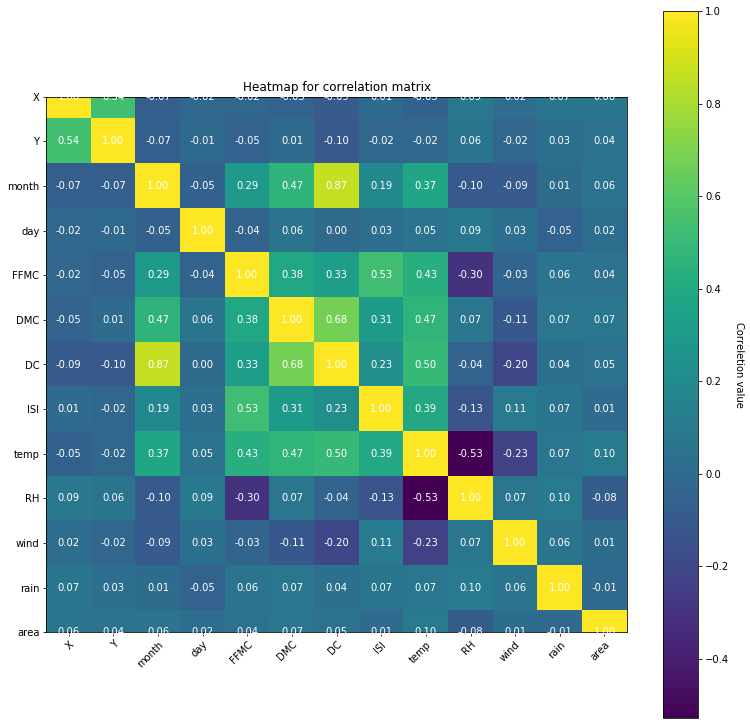

In [11]:
correlations = dataset.corr()
fig, ax = plt.subplots(figsize=(13,13))
im = ax.imshow(correlations)
ax.set_xticks(np.arange(len(featureNames)))
ax.set_yticks(np.arange(len(featureNames)))
# label them with the respective list entries
ax.set_xticklabels(featureNames)
ax.set_yticklabels(featureNames)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(featureNames)):
    for j in range(len(featureNames)):
        text = ax.text(j, i, "{0:.2f}".format(correlations.iloc[i, j]), ha="center", va="center", color="w")
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correletion value", rotation=-90, va="bottom")

ax.set_title("Heatmap for correlation matrix")
plt.show()


The correletion matrix in detail:

In [12]:
correlations

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519


**Target value**:

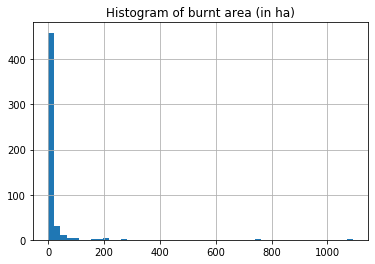

In [13]:
dataset['area'].hist(bins=50)
plt.title('Histogram of burnt area (in ha)')
plt.show()

Burnt area is very skewed, with the majority of the fires presenting a small size. The logarithm function can be applied to reduce skewness and improve symmetry. More precisely, ln(x+1) transform can be applied and model prediction will need to be post-processed with the inverse transformation.

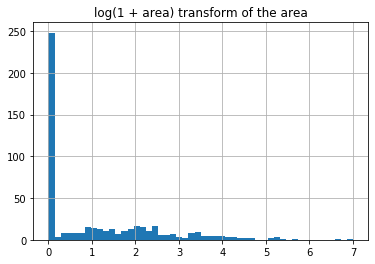

In [14]:
dataset['area'] = np.log1p(dataset['area'])
dataset['area'].hist(bins=50)
plt.title('log(1 + area) transform of the area')
plt.show()

___________________________________________________________________________________________

Removing the target attribute from the dataset structure.

In [15]:
dataFrame = dataset
dataset = dataset.values

X = dataset[:,0:12]
Y = dataset[:,12]

**Dataset partition**
The dataset partition is given by:
- Train: 70%;
- Test: 30%.

Another operation on the dataset is the standardization.

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.30, random_state=0)

print("The size of the training set is:", len(X_train))
print("The size of the test set is:", len(X_test))

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Pre-compute post-processed Ys
Y_train_post = np.expm1(Y_train)
Y_test_post = np.expm1(Y_test)

The size of the training set is: 361
The size of the test set is: 156


____________________________________________________________________

## 3. Definition of functions

### 3.1 PCA

In [17]:
def plotPCACumulativeExplainedVariance(pca):
    plt.bar(np.arange(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, color='orange')
    plt.plot(np.arange(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
    plt.title('Explained variance by different principal components')
    plt.xlabel('Number of components')
    plt.ylabel('Explained variance in percent');

In [18]:
def makePCA(X_train_, X_test_):
    pca = PCA(n_components=.95)
    pca.fit(X_train_)
    X_train_pca = pca.transform(X_train_)
    X_test_pca = pca.transform(X_test_)
    plotPCACumulativeExplainedVariance(pca)
    return X_train_pca, X_test_pca

Apply the mapping between the old representetion and the new representation.

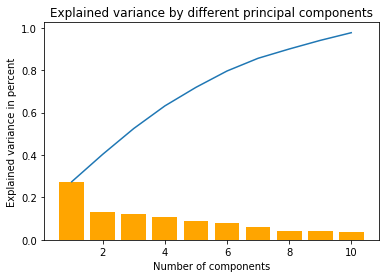

In [19]:
X_train_pca, X_test_pca = makePCA(X_train, X_test)

Aggiungere il grafico della varianza

### 3.2 Linear regression 

In [20]:
def makeLinearRegression(X_train_, Y_train_, Y_train_post_, X_test_, Y_test_post_):
    model = LinearRegression()
    model.fit(X_train_, Y_train_)
    
    Y_predict = model.predict(X_test_)
    # Post-processing
    Y_predict_post = np.expm1(Y_predict)   
    print("Test results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_test_post_, Y_predict_post)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_test_post_, Y_predict_post))
    
    Y_predict_train = model.predict(X_train_)
    # Post-processing
    Y_predict_train_post = np.expm1(Y_predict_train)    
    print("Train results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_train_post_, Y_predict_train_post)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_train_post_, Y_predict_train_post))

**With PCA:**

In [22]:
makeLinearRegression(X_train_pca, Y_train, Y_train_post, X_test_pca, Y_test_post)

Test results:
	RMSE: 92.14592846553869
	MAE: 18.16214979252076
Train results:
	RMSE: 47.841758573691436
	MAE: 10.610887379379752


**Without PCA:**

In [23]:
makeLinearRegression(X_train, Y_train, Y_train_post, X_test, Y_test_post)

Test results:
	RMSE: 92.14825058643733
	MAE: 18.13971368427707
Train results:
	RMSE: 47.806278993128934
	MAE: 10.53598011858388


The prediction of the model with PCA is better then the result of the model without PCA.

### 3.3 Decision Tree Regression

In [28]:
def makeDecisionTree(X_train_, Y_train_, Y_train_post_, X_test_, Y_test_post_):
    decisionTree = GridSearchCV(estimator=DecisionTreeRegressor(),
                                param_grid={'max_depth': [1, 2, 3, 5, 10, 15, 20], 'criterion': ["mse", "friedman_mse", "mae"]},
                                cv=10, iid=False)
    decisionTree.fit(X_train_, Y_train_)
    
    Y_predict = decisionTree.predict(X_test_)
    # Post-processing
    Y_predict_post = np.expm1(Y_predict)   
    print("Test results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_test_post_, Y_predict_post)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_test_post_, Y_predict_post))
    
    Y_predict_train = decisionTree.predict(X_train_)
    # Post-processing
    Y_predict_train_post = np.expm1(Y_predict_train)    
    print("Train results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_train_post_, Y_predict_train_post)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_train_post_, Y_predict_train_post))
    
    tree.plot_tree(decisionTree.best_estimator_)

**With PCA:**

Test results:
	RMSE: 92.17477334191815
	MAE: 18.195085459283014
Train results:
	RMSE: 47.87901192846342
	MAE: 10.497353874051106


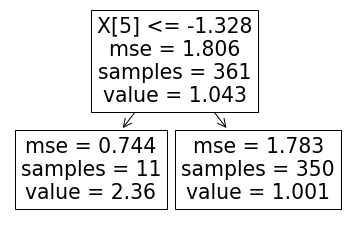

In [29]:
makeDecisionTree(X_train_pca, Y_train, Y_train_post, X_test_pca, Y_test_post)

**Without PCA:**

Test results:
	RMSE: 92.19426376330951
	MAE: 18.144097757825705
Train results:
	RMSE: 47.88401023866265
	MAE: 10.509331374642663


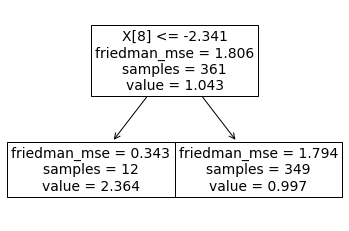

In [30]:
makeDecisionTree(X_train, Y_train, Y_train_post, X_test, Y_test_post)

### 3.4 Random forest

In [31]:
def makeRandomForest(X_train_, Y_train_, Y_train_post_, X_test_, Y_test_post_):
    randomForest = GridSearchCV(estimator=RandomForestRegressor(n_estimators=100),
                                param_grid={'max_depth': [1, 2, 3, 5, 10, 15, 20], 'criterion': ["mse", "mae"]},
                                cv=10, iid=False, n_jobs=-1)
    randomForest.fit(X_train_, Y_train_)
    
    Y_predict = randomForest.predict(X_test_)
    # Post-processing
    Y_predict_post = np.expm1(Y_predict)   
    print("Test results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_test_post_, Y_predict_post)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_test_post_, Y_predict_post))
    
    Y_predict_train = randomForest.predict(X_train_)
    # Post-processing
    Y_predict_train_post = np.expm1(Y_predict_train)    
    print("Train results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_train_post_, Y_predict_train_post)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_train_post_, Y_predict_train_post))

**With PCA:**

In [32]:
makeRandomForest(X_train_pca, Y_train, Y_train_post, X_test_pca, Y_test_post)

Test results:
	RMSE: 92.1913464650638
	MAE: 18.17974425601199
Train results:
	RMSE: 47.707947117565475
	MAE: 10.59769922767766


**Without PCA:**

In [33]:
makeRandomForest(X_train, Y_train, Y_train_post, X_test, Y_test_post)

Test results:
	RMSE: 92.18008862680617
	MAE: 18.123153418932933
Train results:
	RMSE: 47.8597803483673
	MAE: 10.579968616248694


### 3.5 SVR

In [34]:
def makeSVR(X_train_, Y_train_, Y_train_post_, X_test_, Y_test_post_):
    svr = GridSearchCV(estimator=SVR(),
                                param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'rbf'], 'epsilon': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
                                cv=10, iid=False, verbose=1, n_jobs=-1)
    svr.fit(X_train_, Y_train_)
    
    Y_predict = svr.predict(X_test_)
    # Post-processing
    Y_predict_post = np.expm1(Y_predict)   
    print("Test results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_test_post_, Y_predict_post)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_test_post_, Y_predict_post))
    
    Y_predict_train = svr.predict(X_train_)
    # Post-processing
    Y_predict_train_post = np.expm1(Y_predict_train)    
    print("Train results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_train_post_, Y_predict_train_post)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_train_post_, Y_predict_train_post))

**With PCA:**

In [35]:
makeSVR(X_train_pca, Y_train, Y_train_post, X_test_pca, Y_test_post)

Fitting 10 folds for each of 686 candidates, totalling 6860 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 592 tasks      | elapsed:    0.6s


Test results:
	RMSE: 92.19305083792023
	MAE: 18.148318084880994
Train results:
	RMSE: 47.875395308314644
	MAE: 10.547860924492122


[Parallel(n_jobs=-1)]: Done 6860 out of 6860 | elapsed: 29.6min finished


**Without PCA:**

In [36]:
makeSVR(X_train, Y_train, Y_train_post, X_test, Y_test_post)

Fitting 10 folds for each of 686 candidates, totalling 6860 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Test results:
	RMSE: 92.1930388227798
	MAE: 18.14624715705041
Train results:
	RMSE: 47.90071924359643
	MAE: 10.616866153142682


[Parallel(n_jobs=-1)]: Done 6860 out of 6860 | elapsed: 45.4min finished


### 3.6 K-NN

In [37]:
def makeKNN(X_train_, Y_train_, Y_train_post_, X_test_, Y_test_post_):
    knn = GridSearchCV(estimator=KNeighborsRegressor(),
                                param_grid={'n_neighbors': [1, 3, 5, 7, 9, 13, 15, 17, 19], 'p': [1, 2]},
                                cv=10, iid=False, verbose=1, n_jobs=-1)
    knn.fit(X_train_, Y_train_)
    
    Y_predict = knn.predict(X_test_)
    # Post-processing
    Y_predict_post = np.expm1(Y_predict)   
    print("Test results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_test_post_, Y_predict_post)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_test_post_, Y_predict_post))
    
    Y_predict_train = knn.predict(X_train_)
    # Post-processing
    Y_predict_train_post = np.expm1(Y_predict_train)    
    print("Train results:")
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(Y_train_post_, Y_predict_train_post)))  # RMSE
    print("\tMAE:", metrics.mean_absolute_error(Y_train_post_, Y_predict_train_post))

**With PCA:**

In [38]:
makeKNN(X_train_pca, Y_train, Y_train_post, X_test_pca, Y_test_post)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Test results:
	RMSE: 92.16688415794432
	MAE: 18.169421094378055
Train results:
	RMSE: 47.83542612907355
	MAE: 10.561844254139585


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.7s finished


**Without PCA:**

In [39]:
makeKNN(X_train, Y_train, Y_train_post, X_test, Y_test_post)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 18 candidates, totalling 180 fits
Test results:
	RMSE: 92.17552843320237
	MAE: 18.215856680791102
Train results:
	RMSE: 47.768450192574484
	MAE: 10.49702346633323


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.6s finished


___________________________________________________________________________________________________________________

## 4. Features selection

### 4.1 STFWI 

STFWI – using spatial, temporal and the four FWI components:
- X
- Y
- month
- day 
- FFMC
- DMC
- DC
- ISI

In [40]:
dataset_STFWI = dataFrame[['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'area']].values

X_STFWI = dataset_STFWI[:,0:8]
Y_STFWI = dataset_STFWI[:,8]

In [41]:
X_train_STFWI, X_test_STFWI, Y_train_STFWI, Y_test_STFWI = train_test_split( X_STFWI, Y_STFWI, test_size=0.30, random_state=0)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train_STFWI)
# Apply transform to both the training set and the test set.
X_train_STFWI = scaler.transform(X_train_STFWI)
X_test_STFWI = scaler.transform(X_test_STFWI)
# Pre-compute post-processed Ys
Y_train_STFWI_post = np.expm1(Y_train_STFWI)
Y_test_STFWI_post = np.expm1(Y_test_STFWI)

**PCA**

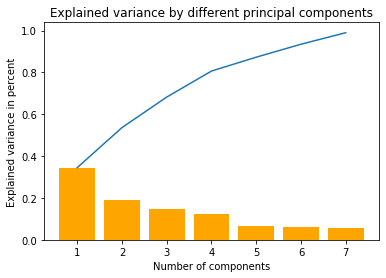

In [42]:
X_train_pca_STFWI, X_test_pca_STFWI = makePCA(X_train_STFWI, X_test_STFWI)

**Linear Regression**

In [43]:
print("With PCA:")
makeLinearRegression(X_train_pca_STFWI, Y_train_STFWI, Y_train_STFWI_post, X_test_pca_STFWI, Y_test_STFWI_post)
print("Without PCA:")
makeLinearRegression(X_train_STFWI, Y_train_STFWI, Y_train_STFWI_post, X_test_STFWI, Y_test_STFWI_post)

With PCA:
Test results:
	RMSE: 92.15231959691837
	MAE: 18.183883622529876
Train results:
	RMSE: 47.8447561776468
	MAE: 10.652389035865474
Without PCA:
Test results:
	RMSE: 92.14872535418829
	MAE: 18.14485406946338
Train results:
	RMSE: 47.8048853001324
	MAE: 10.571914996357917


**Decison Tree**

With PCA:
Test results:
	RMSE: 92.2143660081423
	MAE: 18.43321492814176
Train results:
	RMSE: 47.33791131841648
	MAE: 10.694396270828658
Without PCA:
Test results:
	RMSE: 92.18389378400633
	MAE: 18.08654826130131
Train results:
	RMSE: 47.88474960902027
	MAE: 10.525604381474567


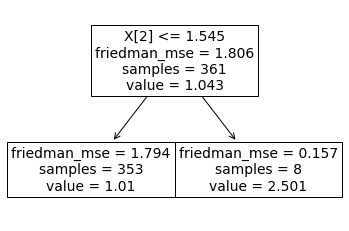

In [44]:
print("With PCA:")
makeDecisionTree(X_train_pca_STFWI, Y_train_STFWI, Y_train_STFWI_post, X_test_pca_STFWI, Y_test_STFWI_post)
print("Without PCA:")
makeDecisionTree(X_train_STFWI, Y_train_STFWI, Y_train_STFWI_post, X_test_STFWI, Y_test_STFWI_post)

**Random forest**

In [45]:
print("With PCA:")
makeRandomForest(X_train_pca_STFWI, Y_train_STFWI, Y_train_STFWI_post, X_test_pca_STFWI, Y_test_STFWI_post)
print("Without PCA:")
makeRandomForest(X_train_STFWI, Y_train_STFWI, Y_train_STFWI_post, X_test_STFWI, Y_test_STFWI_post)

With PCA:
Test results:
	RMSE: 92.19319549784912
	MAE: 18.194196619174463
Train results:
	RMSE: 47.73434104970151
	MAE: 10.640393704839767
Without PCA:
Test results:
	RMSE: 92.16803496690878
	MAE: 18.133122932729563
Train results:
	RMSE: 47.85609751021358
	MAE: 10.604943038863155


**SVR**

In [46]:
print("With PCA:")
makeSVR(X_train_pca_STFWI, Y_train_STFWI, Y_train_STFWI_post, X_test_pca_STFWI, Y_test_STFWI_post)
print("Without PCA:")
makeSVR(X_train_STFWI, Y_train_STFWI, Y_train_STFWI_post, X_test_STFWI, Y_test_STFWI_post)

With PCA:
Fitting 10 folds for each of 686 candidates, totalling 6860 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 880 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 6418 tasks      | elapsed: 10.8min


Test results:
	RMSE: 92.20099544628088
	MAE: 18.166529043191797
Train results:
	RMSE: 47.89585938907642
	MAE: 10.60986061243626
Without PCA:
Fitting 10 folds for each of 686 candidates, totalling 6860 fits


[Parallel(n_jobs=-1)]: Done 6860 out of 6860 | elapsed: 16.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Test results:
	RMSE: 92.19384625019862
	MAE: 18.155785016652754
Train results:
	RMSE: 47.892024556310815
	MAE: 10.586804821248226


[Parallel(n_jobs=-1)]: Done 6860 out of 6860 | elapsed: 26.7min finished


**K-NN**

In [47]:
print("With PCA:")
makeKNN(X_train_pca_STFWI, Y_train_STFWI, Y_train_STFWI_post, X_test_pca_STFWI, Y_test_STFWI_post)
print("Without PCA:")
makeKNN(X_train_STFWI, Y_train_STFWI, Y_train_STFWI_post, X_test_STFWI, Y_test_STFWI_post)

With PCA:
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Test results:
	RMSE: 92.12239345158982
	MAE: 18.26807193955461
Train results:
	RMSE: 47.74962246644228
	MAE: 10.553614916170277
Without PCA:
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Test results:
	RMSE: 92.13983890723144
	MAE: 18.28545122659759
Train results:
	RMSE: 47.7401560992086
	MAE: 10.522262812995741


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.8s finished


### 4.2 STM

STM – with the spatial, temporal and four weather variables:
- X
- Y
- month
- day 
- temp
- RH
- wind
- rain

In [48]:
dataset_STM = dataFrame[['X', 'Y', 'month', 'day', 'temp', 'RH', 'wind', 'rain', 'area']].values

X_STM = dataset_STM[:,0:8]
Y_STM = dataset_STM[:,8]

In [49]:
X_train_STM, X_test_STM, Y_train_STM, Y_test_STM = train_test_split( X_STM, Y_STM, test_size=0.30, random_state=0)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train_STM)
# Apply transform to both the training set and the test set.
X_train_STM = scaler.transform(X_train_STM)
X_test_STM = scaler.transform(X_test_STM)
# Pre-compute post-processed Ys
Y_train_STM_post = np.expm1(Y_train_STM)
Y_test_STM_post = np.expm1(Y_test_STM)

**PCA**

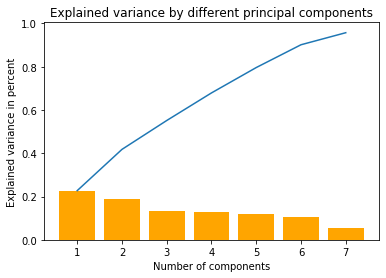

In [50]:
X_train_pca_STM, X_test_pca_STM = makePCA(X_train_STM, X_test_STM)

**Linear Regression**

In [51]:
print("With PCA:")
makeLinearRegression(X_train_pca_STM, Y_train_STM, Y_train_STM_post, X_test_pca_STM, Y_test_STM_post)
print("Without PCA:")
makeLinearRegression(X_train_STM, Y_train_STM, Y_train_STM_post, X_test_STM, Y_test_STM_post)

With PCA:
Test results:
	RMSE: 92.15151106201495
	MAE: 18.150017655101664
Train results:
	RMSE: 47.82321464276788
	MAE: 10.624137658613316
Without PCA:
Test results:
	RMSE: 92.14652678370939
	MAE: 18.163785474075006
Train results:
	RMSE: 47.837950727764095
	MAE: 10.58670266619195


**Decision Tree**

With PCA:
Test results:
	RMSE: 92.18389378400633
	MAE: 18.08654826130131
Train results:
	RMSE: 47.88474960902027
	MAE: 10.525604381474567
Without PCA:
Test results:
	RMSE: 92.19426376330951
	MAE: 18.144097757825705
Train results:
	RMSE: 47.88401023866265
	MAE: 10.509331374642663


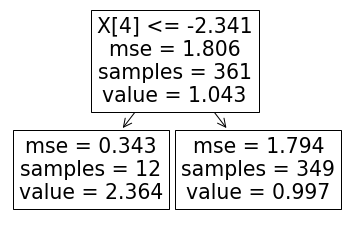

In [52]:
print("With PCA:")
makeDecisionTree(X_train_pca_STM, Y_train_STM, Y_train_STM_post, X_test_pca_STM, Y_test_STM_post)
print("Without PCA:")
makeDecisionTree(X_train_STM, Y_train_STM, Y_train_STM_post, X_test_STM, Y_test_STM_post)

**Random Forest**

In [53]:
print("With PCA:")
makeRandomForest(X_train_pca_STM, Y_train_STM, Y_train_STM_post, X_test_pca_STM, Y_test_STM_post)
print("Without PCA:")
makeRandomForest(X_train_STM, Y_train_STM, Y_train_STM_post, X_test_STM, Y_test_STM_post)

With PCA:
Test results:
	RMSE: 92.1899916151903
	MAE: 18.15037278587936
Train results:
	RMSE: 47.828957062690165
	MAE: 10.610382888363715
Without PCA:
Test results:
	RMSE: 92.18204710544073
	MAE: 18.124937060217945
Train results:
	RMSE: 47.866411856683584
	MAE: 10.557513507945346


**SVR**

In [54]:
print("With PCA:")
makeSVR(X_train_pca_STM, Y_train_STM, Y_train_STM_post, X_test_pca_STM, Y_test_STM_post)
print("Without PCA:")
makeSVR(X_train_STM, Y_train_STM, Y_train_STM_post, X_test_STM, Y_test_STM_post)

With PCA:
Fitting 10 folds for each of 686 candidates, totalling 6860 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 5401 tasks      | elapsed:   56.1s


Test results:
	RMSE: 92.1748998902858
	MAE: 18.14780825228582
Train results:
	RMSE: 47.845510814692545
	MAE: 10.483017096132736
Without PCA:
Fitting 10 folds for each of 686 candidates, totalling 6860 fits


[Parallel(n_jobs=-1)]: Done 6860 out of 6860 | elapsed: 36.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 4854 tasks      | elapsed:    9.8s


Test results:
	RMSE: 92.19292759240147
	MAE: 18.127233810711985
Train results:
	RMSE: 47.88696239916904
	MAE: 10.569444772719228


[Parallel(n_jobs=-1)]: Done 6860 out of 6860 | elapsed: 36.5min finished


**K-NN**

In [55]:
print("With PCA:")
makeKNN(X_train_pca_STM, Y_train_STM, Y_train_STM_post, X_test_pca_STM, Y_test_STM_post)
print("Without PCA:")
makeKNN(X_train_STM, Y_train_STM, Y_train_STM_post, X_test_STM, Y_test_STM_post)

With PCA:
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Test results:
	RMSE: 92.18852719962838
	MAE: 18.28458871661289
Train results:
	RMSE: 47.7608647058054
	MAE: 10.562987456863747
Without PCA:
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Test results:
	RMSE: 92.21228082868895
	MAE: 18.2771106418396
Train results:
	RMSE: 47.7724179299934
	MAE: 10.541827883021154


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.7s finished


### 4.3 FWI

FWI – using only the four FWI components:
- FFMC
- DMC
- DC
- ISI

In [56]:
dataset_FWI = dataFrame[['FFMC', 'DMC', 'DC', 'ISI', 'area']].values

X_FWI = dataset_FWI[:,0:4]
Y_FWI = dataset_FWI[:,4]

In [57]:
X_train_FWI, X_test_FWI, Y_train_FWI, Y_test_FWI = train_test_split( X_FWI, Y_FWI, test_size=0.30, random_state=0)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train_FWI)
# Apply transform to both the training set and the test set.
X_train_FWI = scaler.transform(X_train_FWI)
X_test_FWI = scaler.transform(X_test_FWI)
# Pre-compute post-processed Ys
Y_train_FWI_post = np.expm1(Y_train_FWI)
Y_test_FWI_post = np.expm1(Y_test_FWI)

**PCA**

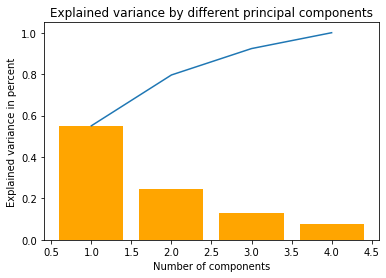

In [58]:
X_train_pca_FWI, X_test_pca_FWI = makePCA(X_train_FWI, X_test_FWI)

**Linear Regression**

In [59]:
print("With PCA:")
makeLinearRegression(X_train_pca_FWI, Y_train_FWI, Y_train_FWI_post, X_test_pca_FWI, Y_test_FWI_post)
print("Without PCA:")
makeLinearRegression(X_train_FWI, Y_train_FWI, Y_train_FWI_post, X_test_FWI, Y_test_FWI_post)

With PCA:
Test results:
	RMSE: 92.17489502021802
	MAE: 18.144522474100455
Train results:
	RMSE: 47.8887552767897
	MAE: 10.688915710763094
Without PCA:
Test results:
	RMSE: 92.17489502021802
	MAE: 18.144522474100455
Train results:
	RMSE: 47.8887552767897
	MAE: 10.688915710763094


**Decision Tree**

With PCA:
Test results:
	RMSE: 92.14956367149783
	MAE: 18.13026568458973
Train results:
	RMSE: 47.871110936617406
	MAE: 10.66276321301827
Without PCA:
Test results:
	RMSE: 92.1912625072396
	MAE: 18.21160155298063
Train results:
	RMSE: 47.895622555763
	MAE: 10.66309374554394


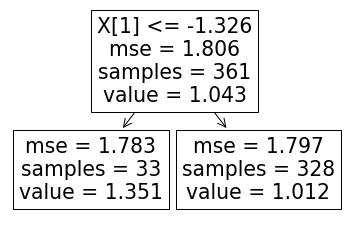

In [60]:
print("With PCA:")
makeDecisionTree(X_train_pca_FWI, Y_train_FWI, Y_train_FWI_post, X_test_pca_FWI, Y_test_FWI_post)
print("Without PCA:")
makeDecisionTree(X_train_FWI, Y_train_FWI, Y_train_FWI_post, X_test_FWI, Y_test_FWI_post)

**Random Forest**

In [61]:
print("With PCA:")
makeRandomForest(X_train_pca_FWI, Y_train_FWI, Y_train_FWI_post, X_test_pca_FWI, Y_test_FWI_post)
print("Without PCA:")
makeRandomForest(X_train_FWI, Y_train_FWI, Y_train_FWI_post, X_test_FWI, Y_test_FWI_post)

With PCA:
Test results:
	RMSE: 92.17129503774885
	MAE: 18.16593583933747
Train results:
	RMSE: 47.84514762782387
	MAE: 10.659781952845837
Without PCA:
Test results:
	RMSE: 92.19810085123376
	MAE: 18.1728448488618
Train results:
	RMSE: 47.883450204955516
	MAE: 10.653849233057288


**SVR**

In [62]:
print("With PCA:")
makeSVR(X_train_pca_FWI, Y_train_FWI, Y_train_FWI_post, X_test_pca_FWI, Y_test_FWI_post)
print("Without PCA:")
makeSVR(X_train_FWI, Y_train_FWI, Y_train_FWI_post, X_test_FWI, Y_test_FWI_post)

With PCA:
Fitting 10 folds for each of 686 candidates, totalling 6860 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 880 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 6173 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 6432 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 6860 out of 6860 | elapsed:  9.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Test results:
	RMSE: 92.1920051208099
	MAE: 18.17890528687977
Train results:
	RMSE: 47.87627441651397
	MAE: 10.60414871550452
Without PCA:
Fitting 10 folds for each of 686 candidates, totalling 6860 fits


[Parallel(n_jobs=-1)]: Done 772 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 6261 tasks      | elapsed:  1.8min


Test results:
	RMSE: 92.1920051208099
	MAE: 18.17890528687977
Train results:
	RMSE: 47.87627441651397
	MAE: 10.60414871550452


[Parallel(n_jobs=-1)]: Done 6860 out of 6860 | elapsed:  9.2min finished


**K-NN**

In [63]:
print("With PCA:")
makeKNN(X_train_pca_FWI, Y_train_FWI, Y_train_FWI_post, X_test_pca_FWI, Y_test_FWI_post)
print("Without PCA:")
makeKNN(X_train_FWI, Y_train_FWI, Y_train_FWI_post, X_test_FWI, Y_test_FWI_post)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


With PCA:
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Test results:
	RMSE: 92.17918409397562
	MAE: 18.20113608168683
Train results:
	RMSE: 47.82051508386746
	MAE: 10.565119096419474
Without PCA:
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Test results:
	RMSE: 92.12769624757304
	MAE: 18.28525649642401
Train results:
	RMSE: 47.78725171219052
	MAE: 10.565109730601439


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.2s finished


### 4.4 Weather Conditions

M – with the four weather conditions:
- temp
- RH
- wind
- rain

In [64]:
dataset_M = dataFrame[['temp', 'RH', 'wind', 'rain', 'area']].values

X_M = dataset_M[:,0:4]
Y_M = dataset_M[:,4]

In [65]:
X_train_M, X_test_M, Y_train_M, Y_test_M = train_test_split( X_M, Y_M, test_size=0.30, random_state=0)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train_M)
# Apply transform to both the training set and the test set.
X_train_M = scaler.transform(X_train_M)
X_test_M = scaler.transform(X_test_M)
# Pre-compute post-processed Ys
Y_train_M_post = np.expm1(Y_train_M)
Y_test_M_post = np.expm1(Y_test_M)

**PCA**

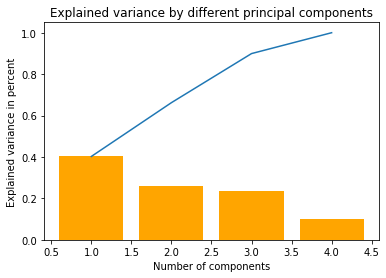

In [66]:
X_train_pca_M, X_test_pca_M = makePCA(X_train_M, X_test_M)

**Linear Regression**

In [67]:
print("With PCA:")
makeLinearRegression(X_train_pca_M, Y_train_M, Y_train_M_post, X_test_pca_M, Y_test_M_post)
print("Without PCA:")
makeLinearRegression(X_train_M, Y_train_M, Y_train_M_post, X_test_M, Y_test_M_post)

With PCA:
Test results:
	RMSE: 92.18185748622761
	MAE: 18.170104011501774
Train results:
	RMSE: 47.895799538208024
	MAE: 10.658782974931215
Without PCA:
Test results:
	RMSE: 92.18185748622761
	MAE: 18.170104011501774
Train results:
	RMSE: 47.895799538208024
	MAE: 10.658782974931215


**Decision Tree**

With PCA:
Test results:
	RMSE: 92.1818651831348
	MAE: 18.08350905767496
Train results:
	RMSE: 47.860378309211505
	MAE: 10.592566386851942
Without PCA:
Test results:
	RMSE: 92.19426376330951
	MAE: 18.144097757825705
Train results:
	RMSE: 47.88401023866265
	MAE: 10.509331374642663


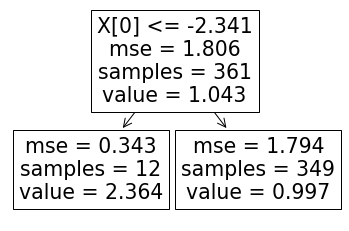

In [68]:
print("With PCA:")
makeDecisionTree(X_train_pca_M, Y_train_M, Y_train_M_post, X_test_pca_M, Y_test_M_post)
print("Without PCA:")
makeDecisionTree(X_train_M, Y_train_M, Y_train_M_post, X_test_M, Y_test_M_post)

**Random Forest**

In [69]:
print("With PCA:")
makeRandomForest(X_train_pca_M, Y_train_M, Y_train_M_post, X_test_pca_M, Y_test_M_post)
print("Without PCA:")
makeRandomForest(X_train_M, Y_train_M, Y_train_M_post, X_test_M, Y_test_M_post)

With PCA:
Test results:
	RMSE: 92.21018695048464
	MAE: 18.1771289570957
Train results:
	RMSE: 47.47440967904741
	MAE: 10.334462434622814
Without PCA:
Test results:
	RMSE: 92.19330761087511
	MAE: 18.11405438386205
Train results:
	RMSE: 47.86150967728541
	MAE: 10.533116759478117


**SVR**

In [70]:
print("With PCA:")
makeSVR(X_train_pca_M, Y_train_M, Y_train_M_post, X_test_pca_M, Y_test_M_post)
print("Without PCA:")
makeSVR(X_train_M, Y_train_M, Y_train_M_post, X_test_M, Y_test_M_post)

With PCA:
Fitting 10 folds for each of 686 candidates, totalling 6860 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 988 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 6261 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 6860 out of 6860 | elapsed: 12.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Test results:
	RMSE: 92.19514099194917
	MAE: 18.122056061835785
Train results:
	RMSE: 47.90190981013201
	MAE: 10.615464942687447
Without PCA:
Fitting 10 folds for each of 686 candidates, totalling 6860 fits


[Parallel(n_jobs=-1)]: Done 1060 tasks      | elapsed:    0.9s


Test results:
	RMSE: 92.19514099194913
	MAE: 18.122056061835718
Train results:
	RMSE: 47.901909810132025
	MAE: 10.615464942687417


[Parallel(n_jobs=-1)]: Done 6860 out of 6860 | elapsed: 12.5min finished


**K-NN**

In [71]:
print("With PCA:")
makeKNN(X_train_pca_M, Y_train_M, Y_train_M_post, X_test_pca_M, Y_test_M_post)
print("Without PCA:")
makeKNN(X_train_M, Y_train_M, Y_train_M_post, X_test_M, Y_test_M_post)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


With PCA:
Fitting 10 folds for each of 18 candidates, totalling 180 fits
Test results:
	RMSE: 92.27783273288235
	MAE: 18.186929270532573
Train results:
	RMSE: 47.73795908470801
	MAE: 10.617567433106478
Without PCA:
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Test results:
	RMSE: 92.2322017560715
	MAE: 18.06588778938964
Train results:
	RMSE: 47.70561177734654
	MAE: 10.597588390015623


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.1s finished
